<a href="https://colab.research.google.com/github/ranipriyanka20/hds5210-2023/blob/main/week14/week14_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with multiple data sets

There are two data files that we'll be working with for this week's assignment.  They are described below.  Load those data files in with Pandas and then work to answering each of the questions below.  All of these files are found in our usual s3 bucket: `https://hds5210-data.s3.amazonaws.com`

## npidata.csv

This file is basic information about every healthcare provider in the US.  It has one row for each NPI (National Provider Identifier).  It contains information such as the provider's name and address.

* https://hds5210-data.s3.amazonaws.com/npidata.csv


## cmsYYYY.csv

These are files about what kinds of procedures and patients providers in the US are serving under CMS programs, Medicare and Medicaid.  Each contains various statistics about providers over the course of a year.  There are three of these, for the years 2014, 2015, and 2016.  These files, however, don't contain information about the provider such as where the provider is located.

* https://hds5210-data.s3.amazonaws.com/cms2014.csv
* https://hds5210-data.s3.amazonaws.com/cms2015.csv
* https://hds5210-data.s3.amazonaws.com/cms2016.csv

## Our Goals

For this assignment, we're going to want to compute some statistics based on the data in the **cms** files, but aggregate that data based on information in the **npidata** file.  As in last week's assignment, you'll need to store your answers in a variable called `answer` at the end of each step.

In [1]:
import pandas as pd

## Part 1

In this first step, we'll need to merge together all of the **cms** files into a single dataframe.  Be careful that these files might not be identical, so you'll have to look a little bit to figure out how to merge them.

As you are merging them, make sure that you retain information about which file (i.e. which year) the data came from.  Call that new columns `year`.

In your `answer` variable, provide a complete data frame that contains all of the rows and columns from the **cms** files, plus an additional column to store the year/file that particular row came from.

The assertion tests will give you a good idea as to if you're merging the files correctly.

In [36]:
answer = None

### SOLUTION

# Load cms files for the years 2014, 2015, and 2016
cms2014_url = "https://hds5210-data.s3.amazonaws.com/cms2014.csv"
cms2015_url = "https://hds5210-data.s3.amazonaws.com/cms2015.csv"
cms2016_url = "https://hds5210-data.s3.amazonaws.com/cms2016.csv"

In [37]:
cms2014 = pd.read_csv(cms2014_url)
cms2015 = pd.read_csv(cms2015_url)
cms2016 = pd.read_csv(cms2016_url)

In [39]:
# Standardize column names
cms2014.columns = cms2014.columns.str.lower().str.replace(' ', '_')
cms2015.columns = cms2015.columns.str.lower().str.replace(' ', '_')
cms2016.columns = cms2016.columns.str.lower().str.replace(' ', '_')

In [40]:
# Identify common columns
common_columns = set(cms2014.columns) & set(cms2015.columns) & set(cms2016.columns)


In [42]:
# Concatenate dataframes to create a single dataframe
answer = pd.concat([cms2014[common_columns], cms2015[common_columns], cms2016[common_columns]], ignore_index=True)


<ipython-input-42-27ef353d073e>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  answer = pd.concat([cms2014[common_columns], cms2015[common_columns], cms2016[common_columns]], ignore_index=True)
<ipython-input-42-27ef353d073e>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  answer = pd.concat([cms2014[common_columns], cms2015[common_columns], cms2016[common_columns]], ignore_index=True)
<ipython-input-42-27ef353d073e>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  answer = pd.concat([cms2014[common_columns], cms2015[common_columns], cms2016[common_columns]], ignore_index=True)


In [44]:

# Add a new column 'year' to store the information about the year/file
answer['year'] = pd.concat([pd.Series([2014] * len(cms2014)),
                            pd.Series([2015] * len(cms2015)),
                            pd.Series([2016] * len(cms2016))], ignore_index=True)

In [45]:
# Confirm the shape of the final dataframe
print(answer.shape)

(193862, 60)


In [48]:
assert(answer.shape == (193862, 60))
assert(list(answer['year'].unique()) == [2014,2015,2016])
assert(set(answer.columns.str.lower()) == set(['year', 'nbr', 'npi', 'provider_type',
       'medicare_participation_indicator', 'number_of_hcpcs', 'total_services',
       'total_unique_benes', 'total_submitted_chrg_amt',
       'total_medicare_allowed_amt', 'total_medicare_payment_amt',
       'total_medicare_stnd_amt', 'drug_suppress_indicator',
       'number_of_drug_hcpcs', 'total_drug_services',
       'total_drug_unique_benes', 'total_drug_submitted_chrg_amt',
       'total_drug_medicare_allowed_amt', 'total_drug_medicare_payment_amt',
       'total_drug_medicare_stnd_amt', 'med_suppress_indicator',
       'number_of_med_hcpcs', 'total_med_services', 'total_med_unique_benes',
       'total_med_submitted_chrg_amt', 'total_med_medicare_allowed_amt',
       'total_med_medicare_payment_amt', 'total_med_medicare_stnd_amt',
       'beneficiary_average_age', 'beneficiary_age_less_65_count',
       'beneficiary_age_65_74_count', 'beneficiary_age_75_84_count',
       'beneficiary_age_greater_84_count', 'beneficiary_female_count',
       'beneficiary_male_count', 'beneficiary_race_white_count',
       'beneficiary_race_black_count', 'beneficiary_race_api_count',
       'beneficiary_race_hispanic_count', 'beneficiary_race_natind_count',
       'beneficiary_race_other_count', 'beneficiary_nondual_count',
       'beneficiary_dual_count', 'beneficiary_cc_afib_percent',
       'beneficiary_cc_alzrdsd_percent', 'beneficiary_cc_asthma_percent',
       'beneficiary_cc_cancer_percent', 'beneficiary_cc_chf_percent',
       'beneficiary_cc_ckd_percent', 'beneficiary_cc_copd_percent',
       'beneficiary_cc_depr_percent', 'beneficiary_cc_diab_percent',
       'beneficiary_cc_hyperl_percent', 'beneficiary_cc_hypert_percent',
       'beneficiary_cc_ihd_percent', 'beneficiary_cc_ost_percent',
       'beneficiary_cc_raoa_percent', 'beneficiary_cc_schiot_percent',
       'beneficiary_cc_strk_percent', 'beneficiary_average_risk_score']))

## Part 2

In this next part, we're going to join the **cms** data with the provider information in the **https://hds5210-data.s3.amazonaws.com/npidata.csv** file.  In this join, we don't want to lose any records from the **cms** files, even if no matching provider exists in the **npidata** file.  However, we don't care about any providers from the **npidata** file that don't have records in the **cms** files.  Those providers can be ignored.

Join the data files together to create one unified data frame called `answer`.  This dataframe should have all the columns from both **cms** and **npidata** files, joined together using the `npi` column.  

Note that `npi` is unique in the **npidata** file.

In [50]:
answer = None

### SOLUTION

# Load npidata file
npidata_url = "https://hds5210-data.s3.amazonaws.com/npidata.csv"
npidata = pd.read_csv(npidata_url)

<ipython-input-50-755e9e8df510>:7: DtypeWarning: Columns (18,33) have mixed types. Specify dtype option on import or set low_memory=False.
  npidata = pd.read_csv(npidata_url)


In [52]:
npidata.head()

,row,NPI,Entity Type Code,Replacement NPI,Employer Identification Number (EIN),Provider Organization Name (Legal Business Name),Provider Last Name (Legal Name),Provider First Name,Provider Middle Name,Provider Name Prefix Text,...,Provider Business Practice Location Address Postal Code,Provider Business Practice Location Address Country Code (If outside U.S.),Provider Business Practice Location Address Telephone Number,Provider Business Practice Location Address Fax Number,Provider Enumeration Date,Last Update Date,NPI Deactivation Reason Code,NPI Deactivation Date,NPI Reactivation Date,Provider Gender Code
0,13,1205839354,1.0000000000,NaN,NaN,NaN,DIFILIPPO,EMIL,A,DR.,...,633664281.0000000000,US,6365615030,6365615033.0000000000,05/23/2005,05/06/2015,NaN,NaN,NaN,M
1,15,1023011079,2.0000000000,NaN,<UNAVAIL>,"ADVANTAGE HOME HEALTH CARE, INC.",NaN,NaN,NaN,NaN,...,604508812.0000000000,US,8154671905,8154676392.0000000000,05/23/2005,12/12/2014,NaN,NaN,NaN,NaN
2,74,1932102969,1.0000000000,NaN,NaN,NaN,HELFER,TAMARA,G,DR.,...,618203909.0000000000,US,2173661255,2173666106.0000000000,05/23/2005,01/24/2014,NaN,NaN,NaN,F
3,88,1477556405,1.0000000000,NaN,NaN,NaN,LINSENMEYER,CHARLES,M,DR.,...,633012881.0000000000,US,6369467050,6369463368.0000000000,05/23/2005,07/08/2007,NaN,NaN,NaN,M
4,89,1386647311,1.0000000000,NaN,NaN,NaN,LASKEN,GARY,W,DR.,...,616142078.0000000000,US,3096925500,3096925508.0000000000,05/23/2005,05/19/2011,NaN,NaN,NaN,M


In [54]:
npidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251661 entries, 0 to 251660
Data columns (total 43 columns):
 #   Column                                                                      Non-Null Count   Dtype  
---  ------                                                                      --------------   -----  
 0   row                                                                         251661 non-null  int64  
 1   NPI                                                                         251661 non-null  int64  
 2   Entity Type Code                                                            251660 non-null  float64
 3   Replacement NPI                                                             5 non-null       float64
 4   Employer Identification Number (EIN)                                        69438 non-null   object 
 5   Provider Organization Name (Legal Business Name)                            69437 non-null   object 
 6   Provider Last Name (Legal Name)     

In [56]:
# Load cms files for the years 2014, 2015, and 2016
cms2014_url = "https://hds5210-data.s3.amazonaws.com/cms2014.csv"
cms2015_url = "https://hds5210-data.s3.amazonaws.com/cms2015.csv"
cms2016_url = "https://hds5210-data.s3.amazonaws.com/cms2016.csv"
cms2014 = pd.read_csv(cms2014_url)
cms2015 = pd.read_csv(cms2015_url)
cms2016 = pd.read_csv(cms2016_url)

# Standardize column names
cms2014.columns = cms2014.columns.str.lower().str.replace(' ', '_')
cms2015.columns = cms2015.columns.str.lower().str.replace(' ', '_')
cms2016.columns = cms2016.columns.str.lower().str.replace(' ', '_')

# Identify common columns
common_columns = set(cms2014.columns) & set(cms2015.columns) & set(cms2016.columns)

# Concatenate dataframes to create a single dataframe
answer = pd.concat([cms2014[common_columns], cms2015[common_columns], cms2016[common_columns]], ignore_index=True)

# Add a new column 'year' to store the information about the year/file
answer['year'] = pd.concat([pd.Series([2014] * len(cms2014)),
                            pd.Series([2015] * len(cms2015)),
                            pd.Series([2016] * len(cms2016))], ignore_index=True)

# Load npidata file
npidata_url = "https://hds5210-data.s3.amazonaws.com/npidata.csv"
npidata = pd.read_csv(npidata_url)

# Merge cms data with npidata
answer = pd.merge(answer, npidata, how='left', left_on='npi', right_on='NPI')

# Confirm the shape of the final dataframe
print(answer.shape)


<ipython-input-56-48ae3d52e0a9>:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  answer = pd.concat([cms2014[common_columns], cms2015[common_columns], cms2016[common_columns]], ignore_index=True)
<ipython-input-56-48ae3d52e0a9>:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  answer = pd.concat([cms2014[common_columns], cms2015[common_columns], cms2016[common_columns]], ignore_index=True)
<ipython-input-56-48ae3d52e0a9>:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  answer = pd.concat([cms2014[common_columns], cms2015[common_columns], cms2016[common_columns]], ignore_index=True)
<ipython-input-56-48ae3d52e0a9>:27: DtypeWarning: Columns (18,33) have mixed types. Specify dtype option on import or set low_memory=False.
  npidata = pd.read_csv(npidata_url)


(193862, 103)


In [57]:
import numpy
assert(answer.shape == (193862, 103))
assert(list(answer['Provider Business Mailing Address State Name'].unique()) == ['IL','MO',numpy.nan,'WY'])
assert(list(answer.groupby('Provider Business Mailing Address State Name').NPI.count()) == [111520, 53366, 4805])

## Part 3

If you did everything right above, you'll notice that grouping by a column with NaN in it will cause some rows to disappear from the aggregation test.  So, let's create a new column called `'State'` that has the same value as whatever is in the `'Provider Business Mailing Address State Name'` column or a value of `'XX'` if there is no state information.

Set `answer` to be your final data frame with the new `'State'` column added.

In [59]:
# Load cms files for the years 2014, 2015, and 2016
cms2014_url = "https://hds5210-data.s3.amazonaws.com/cms2014.csv"
cms2015_url = "https://hds5210-data.s3.amazonaws.com/cms2015.csv"
cms2016_url = "https://hds5210-data.s3.amazonaws.com/cms2016.csv"
cms2014 = pd.read_csv(cms2014_url)
cms2015 = pd.read_csv(cms2015_url)
cms2016 = pd.read_csv(cms2016_url)

# Standardize column names
cms2014.columns = cms2014.columns.str.lower().str.replace(' ', '_')
cms2015.columns = cms2015.columns.str.lower().str.replace(' ', '_')
cms2016.columns = cms2016.columns.str.lower().str.replace(' ', '_')

# Identify common columns
common_columns = set(cms2014.columns) & set(cms2015.columns) & set(cms2016.columns)

# Concatenate dataframes to create a single dataframe
answer = pd.concat([cms2014[common_columns], cms2015[common_columns], cms2016[common_columns]], ignore_index=True)

# Add a new column 'year' to store the information about the year/file
answer['year'] = pd.concat([pd.Series([2014] * len(cms2014)),
                            pd.Series([2015] * len(cms2015)),
                            pd.Series([2016] * len(cms2016))], ignore_index=True)

# Load npidata file
npidata_url = "https://hds5210-data.s3.amazonaws.com/npidata.csv"
npidata = pd.read_csv(npidata_url)
# Create a new column 'State' based on 'Provider Business Mailing Address State Name'
answer = pd.merge(answer, npidata, how='left', left_on='npi', right_on='NPI')

# Create the 'State' column and fill NaN values with 'XX'
answer['State'] = answer['Provider Business Mailing Address State Name'].fillna('XX')

# Set answer to be your final dataframe with the new 'State' column added
answer = answer.copy()  # Make a copy to avoid SettingWithCopyWarning

# Confirm the shape of the final dataframe
print(answer.shape)

<ipython-input-59-4bdda1b23b10>:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  answer = pd.concat([cms2014[common_columns], cms2015[common_columns], cms2016[common_columns]], ignore_index=True)
<ipython-input-59-4bdda1b23b10>:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  answer = pd.concat([cms2014[common_columns], cms2015[common_columns], cms2016[common_columns]], ignore_index=True)
<ipython-input-59-4bdda1b23b10>:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  answer = pd.concat([cms2014[common_columns], cms2015[common_columns], cms2016[common_columns]], ignore_index=True)
<ipython-input-59-4bdda1b23b10>:27: DtypeWarning: Columns (18,33) have mixed types. Specify dtype option on import or set low_memory=False.
  npidata = pd.read_csv(npidata_url)


(193862, 104)


In [60]:
assert(list(answer.groupby('State').npi.count()) == [111520, 53366, 4805, 24171])
assert(answer.shape == (193862, 104))

## Part 4

Next, let's summarize the data by year and by State.  Create a pivot table that contains one row for each state and one column for each year.  Within the pivot table, put a sum of total services as the values.

Assign `answer` to be that resulting pivot table.  In the tests, I'm going to plot a bar chart of your pivot table.

In [61]:
# Load cms files for the years 2014, 2015, and 2016
cms2014_url = "https://hds5210-data.s3.amazonaws.com/cms2014.csv"
cms2015_url = "https://hds5210-data.s3.amazonaws.com/cms2015.csv"
cms2016_url = "https://hds5210-data.s3.amazonaws.com/cms2016.csv"
cms2014 = pd.read_csv(cms2014_url)
cms2015 = pd.read_csv(cms2015_url)
cms2016 = pd.read_csv(cms2016_url)


In [63]:
# Standardize column names
cms2014.columns = cms2014.columns.str.lower().str.replace(' ', '_')
cms2015.columns = cms2015.columns.str.lower().str.replace(' ', '_')
cms2016.columns = cms2016.columns.str.lower().str.replace(' ', '_')


In [64]:
# Identify common columns
common_columns = set(cms2014.columns) & set(cms2015.columns) & set(cms2016.columns)

# Concatenate dataframes to create a single dataframe
answer = pd.concat([cms2014[common_columns], cms2015[common_columns], cms2016[common_columns]], ignore_index=True)

# Add a new column 'year' to store the information about the year/file
answer['year'] = pd.concat([pd.Series([2014] * len(cms2014)),
                            pd.Series([2015] * len(cms2015)),
                            pd.Series([2016] * len(cms2016))], ignore_index=True)


<ipython-input-64-b3b2775c8930>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  answer = pd.concat([cms2014[common_columns], cms2015[common_columns], cms2016[common_columns]], ignore_index=True)
<ipython-input-64-b3b2775c8930>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  answer = pd.concat([cms2014[common_columns], cms2015[common_columns], cms2016[common_columns]], ignore_index=True)
<ipython-input-64-b3b2775c8930>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  answer = pd.concat([cms2014[common_columns], cms2015[common_columns], cms2016[common_columns]], ignore_index=True)


In [65]:
# Load npidata file
npidata_url = "https://hds5210-data.s3.amazonaws.com/npidata.csv"
npidata = pd.read_csv(npidata_url)


<ipython-input-65-0a1b0be1c238>:3: DtypeWarning: Columns (18,33) have mixed types. Specify dtype option on import or set low_memory=False.
  npidata = pd.read_csv(npidata_url)


In [66]:
# Merge cms data with npidata
answer = pd.merge(answer, npidata, how='left', left_on='npi', right_on='NPI')

In [67]:
# Create a new column 'State' based on 'Provider Business Mailing Address State Name'
answer['State'] = answer['Provider Business Mailing Address State Name'].fillna('XX')

In [68]:
# Set display options to show all decimal places
pd.set_option('display.float_format', lambda x: '{:.10f}'.format(x) if pd.notna(x) else '')


In [69]:
# Create a pivot table with one row for each state and one column for each year
pivot_table = answer.pivot_table(values='total_services', index='State', columns='year', aggfunc='sum')

In [70]:
# Assign answer to be the resulting pivot table
answer = pivot_table

In [71]:
# Convert the values to strings for display and verification
answer_str = answer.applymap(lambda x: '{:.17f}'.format(x) if pd.notna(x) else 'nan')

In [72]:
# Display values for verification
print(answer_str)

year                          2014                         2015  \
State                                                             
IL     101393758.40000000596046448  103048716.29999999701976776   
MO      48577227.10000000149011612   50808468.00000000000000000   
WY       3487240.60000000009313226    3800978.89999999990686774   
XX      14938636.40000000037252903   16533705.19999999925494194   

year                          2016  
State                               
IL     105432032.40000000596046448  
MO      50854632.10000000149011612  
WY       3604487.89999999990686774  
XX      16705781.40000000037252903  


In [73]:
# Confirm the shape of the resulting pivot table
print(answer.shape)
# (4, 3)

# Check the sum of total services for the entire pivot table
print(answer.sum().sum())


# Check the sum of total services for the year 2016
print(answer[2016].sum())


# Check the sum of total services for the state of Wyoming (WY)
print(answer.loc['WY'].sum())


(4, 3)
519185664.7
176596933.8
10892707.4


In [74]:
assert(answer.shape == (4,3))
assert(answer.sum().sum() == 519185664.7)
assert(answer[2016].sum() == 176596933.8)
assert(answer.loc['WY'].sum() == 10892707.4)

<Axes: xlabel='State'>

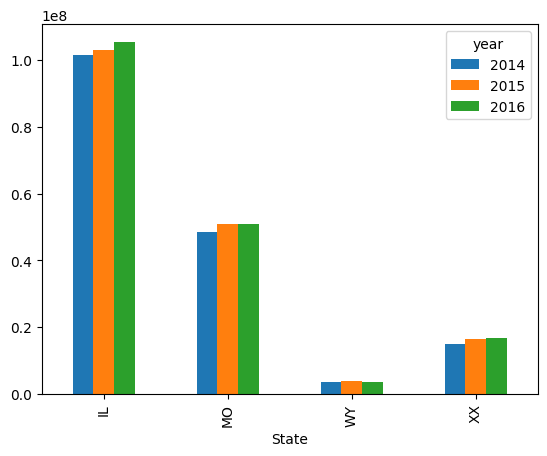

In [75]:
%matplotlib inline
answer.plot.bar()